# Module 2 - Part 2: Gradients and Edge Detection

## 2.4 Image Gradients

A gradient is a measure of the change in the intensity of an image. For color images it is the change in the intensity of each color channel. For grayscale images it is the change in the intensity of each pixel. For example, the following grayscale image has an intensity increase from left to right. An increase in intensity forms a positive gradient.

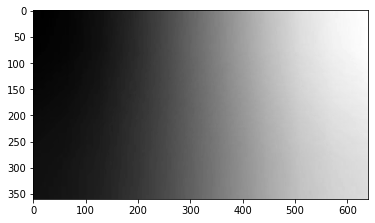

In [18]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('data/gradient.jpg')
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# Show image
plt.imshow(gray, cmap='gray')
plt.show()

When the change in intensity is sudden, we as humans perceive it as discontinuity or as an "edge". Let's load an image in both color and gray scale and see how the color and intensity looks along a specified like. We will use the function `profile_line` fromt he library *skimage* to extract the intensity along a specified line.


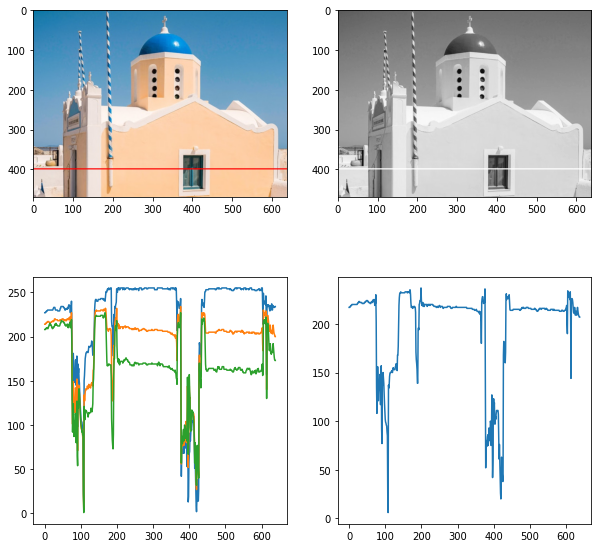

In [19]:
from skimage.measure import profile_line        # Library function for extarcting the color profile of an image along a line

img = cv.imread('data/church.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)        # Convert from BGR to RGB color scheme
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)      # Convert to grayscale

# Extract profile line at raw 400
(x1, y1) = (col1, row1) = (0, 400)              # Start point
(x2, y2) = (col2, row2) = (img.shape[1], 400)   # End point

color_profile = profile_line(img, (row1, col1), (row2, col2))
intensity_profile = profile_line(gray, (row1, col1), (row2, col2))

# Draw a line at raw 400
cv.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
cv.line(gray, (x1, y1), (x2, y2), (255, 255, 255), 2)

plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
plt.imshow(gray, cmap='gray')
plt.subplot(223)
plt.plot(color_profile)
plt.subplot(224)
plt.plot(intensity_profile)
plt.show()



As we can see, in bright areas the intensity is high and in dark areas it is low. When there is a sudden change in intesity we see a sudden dip or increase in the intesity curve. If we define the intesity along the line as a function $f(x)$, where $x$ is the position along the line, then the gradient is defined as $f'(x) = df/dx$, i.e. as the first derivative of the intensity function.

Let's observe what happens to the intensity and gradient of the intensity on a more simple image at row=200.

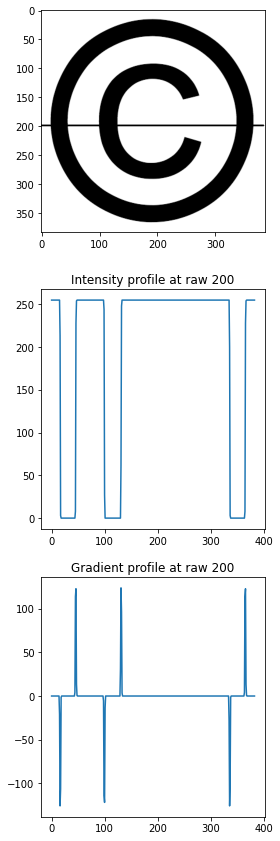

In [20]:
img = cv.imread('data/copyright.png', cv.IMREAD_GRAYSCALE)

intensity200 = profile_line(img, (200, 0), (200, 383))
grad200 = np.gradient(intensity200)

cv.line(img, (0, 200), (383, 200), (0, 0, 0), 2)

# Show the image, intesity profile and gradient profile
plt.figure(figsize=(4, 15))
plt.subplot(311)
plt.imshow(img, cmap='gray')
plt.subplot(312)
plt.plot(intensity200), plt.title('Intensity profile at raw 200')
plt.subplot(313)
plt.plot(grad200), plt.title('Gradient profile at raw 200')
plt.show()

We can observe that when there is an increase in intensity, the gradient (first derivative of the intensity function) is positive and when there is a decrease in intensity, the gradient is negative.

### Sobel derivatives

The gradient above was calculated along a horizontal line, one pixel thick. If we want to calculate the gradient along all horizontal lines of the image, we repeat the above process for each row of the image, or we can apply a filter that can achieve this effect. One such filter is known as the **Sobel** filter or operator. The Sobel filter is a special case of the Gaussian filter. The difference between the Gaussian filter and the Sobel filter is that the Sobel filter is directional, i.e. it only calculates the gradient along a single direction, eg. along the x-axis (horizontal) or y-axis (vertical).

$$ 
sobelFilterHorizontal = \begin{bmatrix} 
-1 & 0 & +1  \\
-2 & 0 & +2 \\
-1 & 0 & +1 
\end{bmatrix} 
$$

$$
sobelFilterVertical = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1
\end{bmatrix}
$$

In OpenCV, the Sobel filter is implemented as the function `cv2.Sobel`. The Sobel filter is a directional filter, so we can specify the direction of the gradient. Let's apply the sobel filter in x and y direction to the copyright image from the previous example.

The parameters of the Sobel filter are:
- img: The image to be filtered.
- ddepth: The depth of the output image. It can be CV_8U, CV_16S, CV_32F, or CV_64F. The input image is a 8-bit/pixel grayscale image or CV_8U. However, we set the output to be of a floating point type. Otherwise, negative gradients will be clipped to 0
- dx: The x-derivative order. It can be 0, 1, or 2.
- dy: The y-derivative order. It can be 0, 1, or 2.
- ksize: The kernel size. It must be odd and the size must be greater than 1.

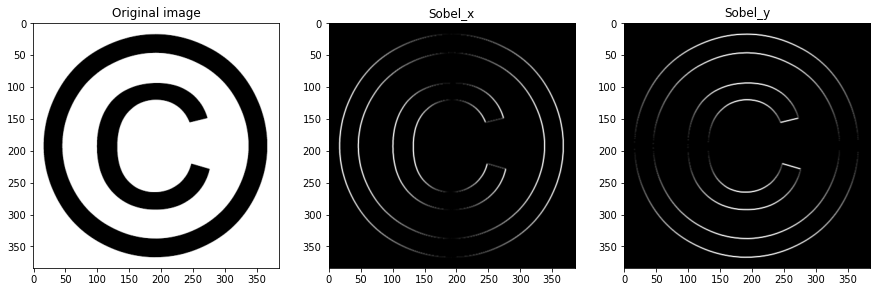

In [21]:
img = cv.imread('data/copyright.png', cv.IMREAD_GRAYSCALE)

sobel_x = cv.Sobel(img, cv.CV_64F, dx=1, dy=0, ksize=3)
sobel_y = cv.Sobel(img, cv.CV_64F, dx=0, dy=1, ksize=3)

# Show sobelx and sobely
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap='gray'), plt.title('Original image')
plt.subplot(132)
plt.imshow(np.abs(sobel_x), cmap='gray'), plt.title('Sobel_x')
plt.subplot(133)
plt.imshow(np.abs(sobel_y), cmap='gray'), plt.title('Sobel_y')
plt.show()


We notice that on the x direction the `sobel_x` filter produces a large absolute value for the gradient where the intensity changes abruptly along the x-axis. On the y direction the `sobel_y` filter produces a large absolute value for the gradient where the intensity changes abruptly along the y-axis. 

To get the gradient in all directions, we sum the absolute value of the x and y gradients, or we can take the euclidean norm (aka L2-norm) of the gradient defined as $\sqrt{g_x^2 + g_y^2}$.

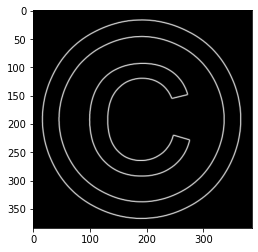

In [22]:
# L2-norm of the gradient
grad = np.sqrt(sobel_x**2 + sobel_y**2)

# Show grad
plt.imshow(grad, cmap='gray')
plt.show()

Let's apply the same process to the church image from the example above.

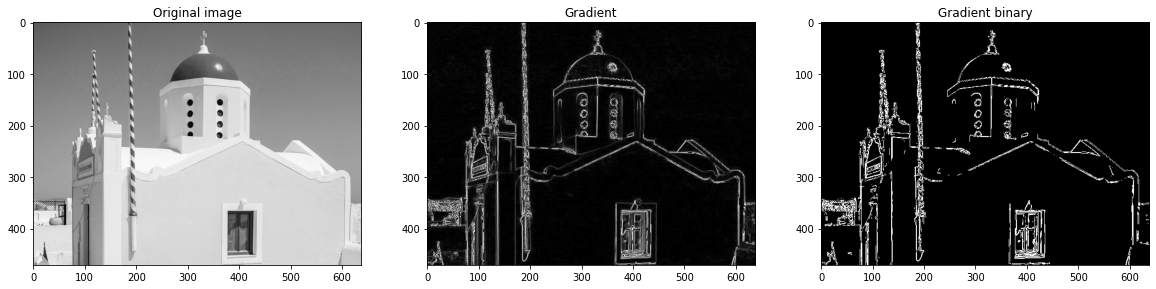

In [23]:
img = cv.imread('data/church.jpg', cv.IMREAD_GRAYSCALE)

sobel_x = cv.Sobel(img, cv.CV_64F, dx=1, dy=0, ksize=3)
sobel_y = cv.Sobel(img, cv.CV_64F, dx=0, dy=1, ksize=3)
grad = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)

thresh, binary_grad = cv.threshold(grad, thresh = 100, maxval = 255, type = cv.THRESH_BINARY)

# Show sobelx and sobely
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.imshow(img, cmap='gray'), plt.title('Original image')
plt.subplot(132)
plt.imshow(grad, cmap='gray'), plt.title('Gradient')
plt.subplot(133)
plt.imshow(binary_grad, cmap='gray'), plt.title('Gradient binary')
plt.show()

## 2.5 Edge Detection


Edge detection is a popular image processing technique that is used to detect the edges of an image. The edges are defined as the points where the intensity changes abruptly. One way to detect the edges is to use the Sobel filter. However, as we saw in the prevous example,the gradient values returned by the sobel filter, after calculating the gradient in all directions, can be any real number. To decide if a pixel is an edge or not, we need to use a threshold and convert the gradient to a binary image. Depending on the threshold value, the strength of the gradient and the noise levels in the image, the white pixels that we get from this process can be either edges or not edges. 

The **Canny Edge Detection** is an algorithm that tries to solve those problems by following a few simple steps:
- **Step 1**: Blur the image to reduce noisy by applying a Gaussian filter.
- **Step 2**: Calculate the gradient in all directions using the Sobel filter.
- **Step 3**: Calculate the magnitude of the gradient at each pixel.
- **Step 4**: Calculate the direction of the gradient at each pixel.
- **Step 5**: Apply a non-maximum suppression to remove spurious edges.
- **Step 6**: Apply a hysteresis threshold to identify the edges.

Let's apply the Canny edge detection to the church image from the example above. The Canny edge detection is implemented as the function `cv2.Canny`. 

The parameters of the Canny edge detection are:
- img: The image to be filtered.
- threshold1: The first threshold for the hysteresis procedure.
- threshold2: The second threshold for the hysteresis procedure.
- apertureSize: The aperture size for the Sobel operator.
- L2gradient: A flag that indicates whether we want to use a L2-norm (true) or L1-norm (false) for the gradient.
- **Returns**: The edges of the image.
- **See also**: [Canny edge detection](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)


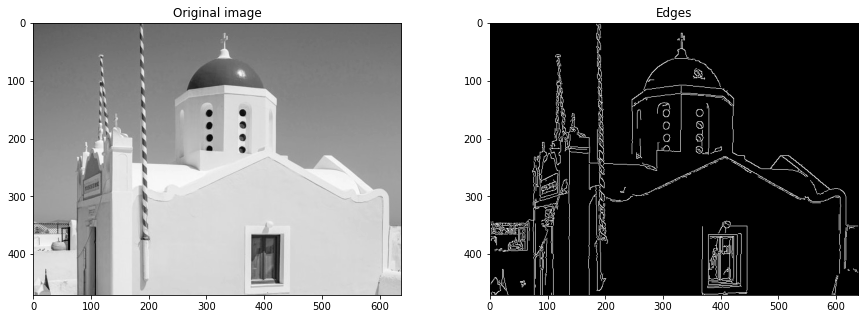

In [24]:
img = cv.imread('data/church.jpg', cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img, threshold1=30, threshold2=200)    # Canny edge detection

# Show original image and edges
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray'), plt.title('Original image')
plt.subplot(122)
plt.imshow(edges, cmap='gray'), plt.title('Edges')
plt.show()
